# MODEL ANALYSIS [TRAIN DATA]

#### Dependecies

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import brier_score_loss

LEN = range(70, 260, 10)

def decodePhed(x):
    return 10**(-x/10.0)

#### LOAD CSV

In [17]:
train_regular =  list()
train_mems =  list()
train_bow =  list()
train_bow_mems =  list()
train_mems_stat = list()
orig = list()
control_60 = list()

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [28]:
reg_fn = "data/stats/train/stats_r_{}.tsv"
m_fn = "data/stats/train/stats_m_{}.tsv"
b_fn = "data/stats/train/stats_b_{}.tsv"
bm_fn = "data/stats/train/stats_bm_{}.tsv"
ms_fn = "data/stats/train/stats_ms_{}.tsv"

In [29]:
for i in range(70, 260, 10):
    train_regular.append(pd.read_csv(reg_fn.format(i), sep='\t'))
    train_mems.append(pd.read_csv(m_fn.format(i), sep='\t'))
    train_bow.append(pd.read_csv(b_fn.format(i), sep='\t'))
    train_bow_mems.append(pd.read_csv(bm_fn.format(i), sep='\t'))
    train_mems_stat.append(pd.read_csv(ms_fn.format(i), sep='\t'))
    mq_size = train_regular[-1][train_regular[-1].aligner == 'recal']['aligner'].count()
    control_60.append(np.ones(mq_size) * 60)


In [30]:
for i in train_regular:
    orig.append(i[i.aligner == 'orig'])


#### Counting correct and incorrect mappings

In [31]:
correct_counts = list()
incorrect_counts = list()
for r, m , b, bm, ms, ori in zip(train_regular, train_mems, train_bow, train_bow_mems, train_mems_stat, orig):
    r = r[r.aligner == 'recal']
    m = m[m.aligner == 'recal']
    b = b[b.aligner == 'recal']
    bm = bm[bm.aligner == 'recal']
    ms = ms[ms.aligner == 'recal']

    rc_counts = r[r.correct == 1].correct.count()
    ri_counts = r[r.correct == 0].correct.count()
    
    mc_counts = m[m.correct == 1].correct.count()
    mi_counts = m[m.correct == 0].correct.count()
    
    bc_counts = b[b.correct == 1].correct.count()
    bi_counts = b[b.correct == 0].correct.count()
    
    bmc_counts = bm[bm.correct == 1].correct.count()
    bmi_counts = bm[bm.correct == 0].correct.count()
    
    msc_counts = ms[ms.correct == 1].correct.count()
    msi_counts = ms[ms.correct == 0].correct.count()
    
    oric_counts = ori[ori.correct == 1].correct.count()
    orii_counts = ori[ori.correct == 0].correct.count()
    
#     print("correct {}, {}, {}, {}, {}, {}".format(rc_counts, mc_counts, bc_counts, bmc_counts, msc_counts,  oric_counts))
#     print("incorrect {}, {}, {}, {}, {}, {}".format(ri_counts, mi_counts, bi_counts, bmi_counts, msi_counts,  orii_counts))
    correct_counts.append(rc_counts)
    incorrect_counts.append(ri_counts)

In [32]:
incorrect_counts = np.array(incorrect_counts)
correct_counts = np.array(correct_counts)

ValueError: x and y must have same first dimension, but have shapes (19,) and (38,)

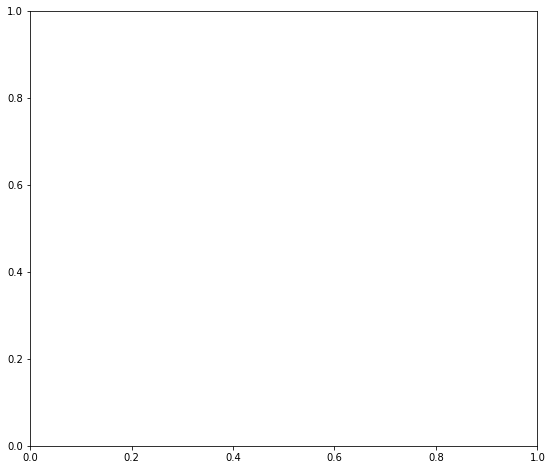

In [33]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.plot(LEN, incorrect_counts)
plt.xlabel('Length')
plt.ylabel('Incorrect amounts')
plt.title('DNA reads Length vs Incorrect Amount');

plt.subplot(1, 2, 2)
plt.plot(LEN, correct_counts)
plt.xlabel('Length')
plt.ylabel('Incorrect amounts')
plt.title('DNA reads Length vs Correct Amount');

plt.savefig("LengthVSIncorrect_train.png")
plt.savefig("LengthVSIncorrect_train.pdf")

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(LEN, incorrect_counts/correct_counts.astype('float'))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Read Length')
plt.ylabel('Incorrect mapping amount %')
plt.title('Incorrect mapping amount % DNA Read Length ');
plt.savefig("LengthVSIncorrectPer_train.png")
plt.savefig("LengthVSIncorrectPer_train.pdf")

#### Brier Score

In [ ]:
r_bc = list()
m_bc = list()
b_bc = list()
bm_bc = list()
ms_bc = list()
ori_bc = list()
control60_bc = list()

for r, m , b, bm, ms, ori, con in zip(train_regular, train_mems, train_bow, train_bow_mems, train_mems_stat, orig, control_60):
    rp = 1 - decodePhed(r.mq.values)
    r['p'] = rp
    r_bc.append(brier_score_loss(r.correct.values, r.p.values))
    
    mp = 1 - decodePhed(m.mq.values)
    m['p'] = mp
    m_bc.append(brier_score_loss(m.correct.values, m.p.values))
    
    bp = 1 - decodePhed(b.mq.values)
    b['p'] = bp
    b_bc.append(brier_score_loss(b.correct.values, b.p.values))
    
    bmp = 1 - decodePhed(bm.mq.values)
    bm['p'] = bmp
    bm_bc.append(brier_score_loss(bm.correct.values, bm.p.values))
    
    msp = 1 - decodePhed(ms.mq.values)
    ms['p'] = msp
    ms_bc.append(brier_score_loss(ms.correct.values, ms.p.values))
    
    orip = 1 - decodePhed(ori.mq.values)
    ori['p'] = orip
    ori_bc.append(brier_score_loss(ori.correct.values, ori.p.values))
    
    conp = 1 - decodePhed(con)
    control60_bc.append(brier_score_loss(ori.correct.values, conp))
    
    

In [ ]:
r_bc = np.array(r_bc)
m_bc = np.array(m_bc)
b_bc = np.array(b_bc)
bm_bc = np.array(bm_bc)
ms_bc = np.array(ms_bc)
ori_bc = np.array(ori_bc)
control60_bc = np.array(control60_bc)

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(LEN, r_bc, c='b', label='mapping quality')
plt.plot(LEN, m_bc, c='r', label='mems')
plt.plot(LEN, b_bc, c='g', label='bag of words')
plt.plot(LEN, bm_bc, c='m', label='bag of words with mems')
plt.plot(LEN, ms_bc, c='y', label='mems stats')
plt.plot(LEN, ori_bc, c='k', label='original')
plt.plot(LEN, control60_bc, c='c', label='control')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Length')
plt.ylabel('Brier Score')
plt.title('DNA reads Length vs Brier Score');
plt.legend();
plt.savefig("DNALengthVsBrierScore_train.png")
plt.savefig("DNALengthVsBrierScore_train.pdf")